# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dewi Rachmawati]
- **Email:** [rchmw.dewi10@gmail.com]
- **ID Dicoding:** [Dewi Rachmawati]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. Memuat Tabel Day menjadi sebuah DataFrame

In [21]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Memuat Tabel Hour menjadi sebuah DataFrame

In [22]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df

In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Berdasarkan tipe data dari seluruh kolom menunjukkan bahwa tidak terdapat kesalahan pada data (seperti perbedaan jumlah data dan missing values)

Untuk memastikan tidak terdapat missing values maka dapat dilakukan pengecekan sebagai berikut

In [24]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Terbukti tidak terdapat missing values pada seluruh kolom

Untuk memastikan tidak terdapat duplikasi data maka dapat dilakukan pengecekan sebagai berikut

In [25]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insights:**
Tidak terdapat data duplikat dan keanehan pada data

2. Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insights:**
- Berdasarkan tipe data dari seluruh kolom menunjukkan bahwa tidak terdapat kesalahan pada data (seperti perbedaan jumlah data dan missing values)

Untuk memastikan tidak terdapat missing values maka dapat dilakukan pengecekan sebagai berikut

In [27]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Terbukti tidak terdapat missing values pada seluruh kolom

Untuk memastikan tidak terdapat duplikasi data maka dapat dilakukan pengecekan sebagai berikut

In [28]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insights:**
Tidak terdapat data duplikat dan keanehan pada data

### Cleaning Data

**Insight:**
Berdasarkan proses assesing data tidak ditemukan adanya kesalahan pada tipe data seperti missing values dan data duplikat maka proses cleaning data dapat dilewati atau artinya data yang diperoleh sudah bersih dan siap untuk tahap exploratory data analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

1. Eksplorasi Data day_df

In [29]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [30]:
pivot_table = pd.pivot_table(day_df, 
                             values='cnt', 
                             index='season', 
                             columns='workingday', 
                             aggfunc='mean')
print(pivot_table)

workingday            0            1
season                              
1           2257.098361  2780.541667
2           5142.428571  4926.664062
3           5474.666667  5718.114504
4           4606.210526  4785.611570


**Keterangan**
- working day<br>
0: menunjukkan weekend<br>
1: menunjukkan working day<br>

- season<br>
1: musim semi<br>
2: musim panas<br>
3: musim gugur<br>
4: musim dingin<br>

**Insights:**
- Secara umum, penyewaan sepeda lebih tinggi pada working day (1) daripada weekend (0), kecuali pada musim panas yang mana saat weekend (0) memiliki sedikit lebih banyak penyewaan daripada working day (1)

In [31]:
import pandas as pd

# Memuat data dari file CSV ke dalam dataframe
day_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/day.csv")

# Menampilkan kondisi cuaca yang unik
unique_weather_conditions = day_df['weathersit'].unique()
print("Kondisi cuaca yang unik:", unique_weather_conditions)


Kondisi cuaca yang unik: [2 1 3]


In [32]:
pivot_table = pd.pivot_table(day_df, 
                             values='cnt', 
                             index='weekday', 
                             columns='weathersit', 
                             aggfunc='mean')

print(pivot_table)

# hitung rata-rata nilai pivot
average_values = pivot_table.mean()
print("\nRata-rata penyewaan sepeda berdasarkan weathersit:") 
print(average_values)

weathersit            1            2            3
weekday                                          
0           4348.472973  4040.433333  1027.000000
1           4485.651515  4234.135135  1393.500000
2           4989.903226  3899.605263  2887.500000
3           5334.328125  3677.151515  1472.142857
4           5014.925373  4271.911765  1383.333333
5           5078.682540  4093.487805          NaN
6           4975.880597  4010.970588  2012.500000

Rata-rata penyewaan sepeda berdasarkan weathersit:
weathersit
1    4889.692050
2    4032.527915
3    1695.996032
dtype: float64


**Keterangan**
- Kolom: weathersit<br>
1: cuaca cerah atau berawan<br>
2: cuaca berkabut dengan angin, berawan<br>
3: cuaca hujan ringan, salju ringan, atau hujan es<br>

- Baris: weekday<br>
0 - 6: Minggu - Sabtu

**Insights:**
- Pivot table menunjukkan rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca (weathersit) dan hari dalam minggu (weekday)
- Rata-rata penyewaan sepeda cenderung lebih tinggi saat cuaca cerah (1) dibandingkan saat cuaca berkabut (2) dan hujan ringan (3)

In [33]:
# Membuat kolom baru untuk mengindikasikan apakah weekday atau weekend
day_df["is_weekend"] = day_df["weekday"].apply(lambda x: 1 if x in [0, 6] else 0)
# Mencetak DataFrame dengan kolom baru
print(day_df.head())

# Menghitung rata-rata penyewaan sepeda lebih besar saat weekend atau weekday
avg_weekday = day_df[day_df["is_weekend"] == 0]["cnt"].mean()
avg_weekend = day_df[day_df["is_weekend"] == 1]["cnt"].mean()

if avg_weekday > avg_weekend:
    print("Penyewaan sepeda saat hari kerja (Senin sampai Jumat) cenderung lebih tinggi dibandingkan saat weekend (Sabtu dan Minggu)")
else:
    print("Penyewaan sepeda saat weekend (Sabtu dan Minggu) cenderung lebih tinggi dibandingkan saat hari kerja (Senin sampai Jumat)")

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  is_weekend  
0   985           1  
1   801           1  
2  1349           0 

**Insights:**
- Berdasarkan DataFrame kolom baru dapat disimpulkan bahwa penyewaan sepeda pada hari kerja cenderung lebih tinggi daripada akhir pekan. Hal ini kemungkinan disebabkan oleh tingginya permintaan penyewaan sepeda untuk keperluan komuter kerja

In [34]:
"""
Teknik Resampling
"""
# Load the dataset
day_df = pd.read_csv("https://raw.githubusercontent.com/dysthymicfact/AnalisisDataPython/refs/heads/main/data/day.csv")

# Mengubah kolom "dteday" menjadi tipe data datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Tipe data datetime diubah menjadi indeks
day_df.set_index("dteday", inplace=True)
print(day_df.head())

            instant  season  yr  mnth  holiday  weekday  workingday  \
dteday                                                                
2011-01-01        1       1   0     1        0        6           0   
2011-01-02        2       1   0     1        0        0           0   
2011-01-03        3       1   0     1        0        1           1   
2011-01-04        4       1   0     1        0        2           1   
2011-01-05        5       1   0     1        0        3           1   

            weathersit      temp     atemp       hum  windspeed  casual  \
dteday                                                                    
2011-01-01           2  0.344167  0.363625  0.805833   0.160446     331   
2011-01-02           2  0.363478  0.353739  0.696087   0.248539     131   
2011-01-03           1  0.196364  0.189405  0.437273   0.248309     120   
2011-01-04           1  0.200000  0.212122  0.590435   0.160296     108   
2011-01-05           1  0.226957  0.229270  0.436957

In [35]:
# Mengubah data harian menjadi bulanan untuk melihat bulan dengan jumlah peminjaman tertinggi
monthly_data = day_df["cnt"].resample("ME").sum().sort_values(ascending=False)
print(monthly_data.head())

dteday
2012-09-30    218573
2012-08-31    214503
2012-07-31    203607
2012-06-30    202830
2012-10-31    198841
Name: cnt, dtype: int64


In [36]:
# Mengelompokkan data berdasarkan hari dalam seminggu untuk melihat hari dengan rata-rata peminjaman tertinggi
weekday_data = day_df.groupby("weekday")["cnt"].mean().sort_values(ascending=False)
print(weekday_data)

weekday
5    4690.288462
4    4667.259615
6    4550.542857
3    4548.538462
2    4510.663462
1    4338.123810
0    4228.828571
Name: cnt, dtype: float64


Resampling digunakan untuk melihat tren jangka panjang dan pola musiman penyewaan sepeda<br>
**Insights:**
- Puncak penyewaan terjadi pada bulan musim panas dan gugur (weathersit 1 dan 2) dengan bulan September 2012 (30-9-2012) merupakan jumlah penyewaan sepeda tertinggi
    - Artinya saat bulan-bulan musim panas (Juli-Agustus) dan musim gugur (September), penyewaan sepeda cenderung lebih tinggi dibandingkan dengan bulan-bulan lainnya
- Hari kerja masih mendominasi sebagai jumlah penyewaan sepeda tertinggi daripada weekend, dimana puncak hari penyewaan tertinggi adalah hari Jumat (kode 5), mungkin untuk persiapan weekend

2. Eksplorasi Data hour_df

In [37]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Membuat kolom baru sebagai "time_of_day" berdasarkan data hour_df untuk mengetahui pola penggunaan sepeda harian spesifik di pagi, siang, sore, atau malam. Dengan kolom baru, dapat diketahui kapan puncak penyewaan sepeda terjadi.

In [38]:
# Mengubah kolom "dteday" menjadi tipe data datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Tipe data datetime diubah menjadi indeks
hour_df.set_index("dteday", inplace=True)
print(hour_df.head())

            instant  season  yr  mnth  hr  holiday  weekday  workingday  \
dteday                                                                    
2011-01-01        1       1   0     1   0        0        6           0   
2011-01-01        2       1   0     1   1        0        6           0   
2011-01-01        3       1   0     1   2        0        6           0   
2011-01-01        4       1   0     1   3        0        6           0   
2011-01-01        5       1   0     1   4        0        6           0   

            weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
dteday                                                                          
2011-01-01           1  0.24  0.2879  0.81        0.0       3          13   16  
2011-01-01           1  0.22  0.2727  0.80        0.0       8          32   40  
2011-01-01           1  0.22  0.2727  0.80        0.0       5          27   32  
2011-01-01           1  0.24  0.2879  0.75        0.0       3        

In [39]:
# Membuat kolom baru "time_of_day" berdasarkan data hour_df
def categorize_hour(hour):
    if 0 <= hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

hour_df["time_of_day"] = hour_df["hr"].apply(categorize_hour)
print(hour_df[["hr", "time_of_day"]].head(24))

            hr time_of_day
dteday                    
2011-01-01   0       Night
2011-01-01   1       Night
2011-01-01   2       Night
2011-01-01   3       Night
2011-01-01   4       Night
2011-01-01   5       Night
2011-01-01   6     Morning
2011-01-01   7     Morning
2011-01-01   8     Morning
2011-01-01   9     Morning
2011-01-01  10     Morning
2011-01-01  11     Morning
2011-01-01  12   Afternoon
2011-01-01  13   Afternoon
2011-01-01  14   Afternoon
2011-01-01  15   Afternoon
2011-01-01  16   Afternoon
2011-01-01  17   Afternoon
2011-01-01  18     Evening
2011-01-01  19     Evening
2011-01-01  20     Evening
2011-01-01  21     Evening
2011-01-01  22     Evening
2011-01-01  23     Evening


In [40]:
hour_df.describe(include="all")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_of_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afternoon
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4375
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


Karena kolom time_of_day yang ditambahkan memiliki tipe data kategorikal maka pada statistik deskriptif (mean, std, min, 25%, 50%, 75%, dan max) menghasilkan tipe data NaN karena hanya relevan untuk kolom numerik. Namun permasalahan tersebut dapat diatasi dengan cara sebagai berikut:

In [41]:
# Statistik deskriptif untuk kolom "cnt" berdasarkan "time_of_day"
time_of_day_stats = hour_df.groupby("time_of_day")["cnt"].describe()
print(time_of_day_stats)

              count        mean         std  min    25%    50%    75%    max
time_of_day                                                                 
Afternoon    4375.0  295.483886  181.656294  3.0  164.5  258.0  390.0  976.0
Evening      4368.0  225.757555  175.218285  2.0   94.0  177.0  306.0  977.0
Morning      4360.0  208.100688  163.972903  1.0   90.0  167.0  288.0  839.0
Night        4276.0   24.908559   30.274492  1.0    6.0   13.0   32.0  283.0


**Insight**:
- Berdasarkan statistik deskriptif, pola penggunaan sepeda selama 1 hari menunjukkan perbedaan signifikan antar kategori waktu. Kategori waktu afternoon mencatat rata-rata penyewaan sepeda tertinggi (295,48 unit), diikuti kategori waktu evening (225,75 unit), morning (208 unit) dan night (25 unit). Dengan demikian, kegiatan operasional dapat dioptimalkan seperti operator sepeda dapat menempatkan sepeda lebih efisien dan memastikan ketersediaan sepeda pada waktu-waktu krusial (afternoon) sehingga meningkatkan kepuasan pelanggan. Selain itu, bisa dijadikan penawaran khusus di jam-jam non puncak untuk mendorong lebih banyak penyewaan sepeda.  

In [42]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam (0-23) dan kondisi cuaca
weather_by_hour = hour_df.pivot_table(values="cnt", index="hr", columns="weathersit", aggfunc="mean")
print(weather_by_hour)

weathersit           1           2           3      4
hr                                                   
0            59.161554   47.232432   28.115385    NaN
1            34.395918   35.541899   17.129630   23.0
2            22.817992   25.491713   14.839286    NaN
3            11.995604   12.452128    6.944444    NaN
4             6.413567    6.721311    4.684211    NaN
5            20.414687   20.141463   13.877551    NaN
6            79.165563   74.612903   55.981818    NaN
7           218.742664  224.733645  131.071429    NaN
8           361.359091  391.283843  213.775862    NaN
9           226.391608  226.848361  128.981481    NaN
10          192.470721  159.469565   77.773585    NaN
11          234.284116  182.678112   85.765957    NaN
12          281.975169  225.869565  137.254545    NaN
13          283.388769  225.855769  116.068966    NaN
14          269.464135  208.654639  122.081967    NaN
15          275.228866  227.814607  138.060606    NaN
16          335.745098  299.

In [43]:
# Menghitung rata-rata kolom weathersit
average_per_weathersit = weather_by_hour.mean(axis=0)
print(average_per_weathersit)

weathersit
1    203.194167
2    177.030980
3    105.441736
4     74.333333
dtype: float64


**Insights:**
- Kondisi cuaca cerah yang lebih mendukung (weathersit 1 atau 2) cenderung menghasilkan rata-rata penyewaan sepeda lebih tinggi dibandingkan kondisi cuaca buruk (weathersit 3 atau 4) 
- Berdasarkan pivot table, kondisi cuaca yang ideal (weathersit 1) menunjukkan nilai rata-rata peminjaman sepeda paling tinggi, terutama pada jam-jam sore (jam 16.00 - 17.00). Sementara itu, nilai rata-rata peminjaman sepeda untuk weathersit 2 dan 3 secara konsisten lebih rendah daripada weathersit 1, menunjukkan penurunan aktivitas pada kondisi cuaca yang sedikit kurang ideal. Di sisi lain, kategori weathersit 4 banyak menampilkan nilai NaN, yang bisa diartikan bahwa data penyewaan sepeda pada kondisi cuaca ekstrem atau tidak biasa tersebut sangat jarang terjadi atau bahkan tidak ada sama sekali, sehingga memerlukan perhatian khusus jika kondisi tersebut muncul
- Pemaparan di atas, secara implisit menjelaskan bahwa diperlukan penyesuaian jumlah sepeda dan redistribusi sepeda berdasarkan prediksi cuaca serta perencanaan strategi promosi yang tepat karena penjadwalan supply sepeda sebaiknya disesuaikan dengan jam-jam dengan permintaan tinggi pada kondisi cuaca yang mendukung. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca dapat mempengaruhi jumlah penyewaan sepeda?

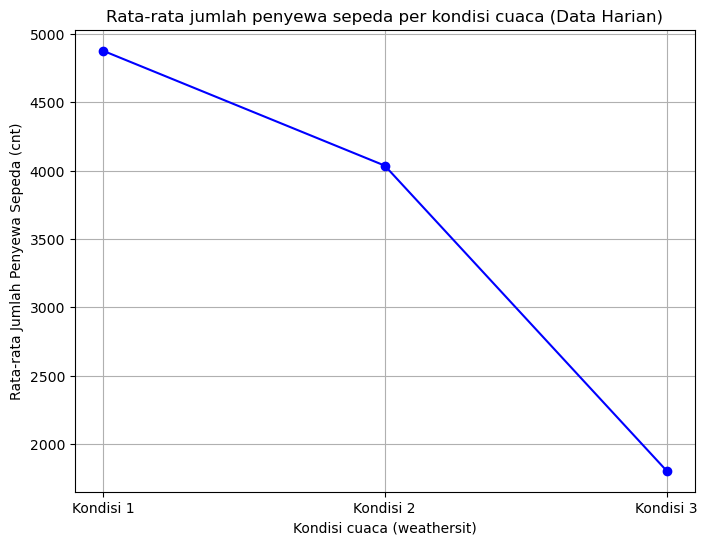

In [44]:
# Menghitung rata-rata jumlah penyewa sepeda untuk setiap kondisi cuaca
avg_per_weather_day = day_df.groupby('weathersit')['cnt'].mean()

# Membuat grafik
plt.figure(figsize=(8, 6))
plt.plot(avg_per_weather_day.index, avg_per_weather_day.values, marker="o", linestyle="-", color="b")
plt.title("Rata-rata jumlah penyewa sepeda per kondisi cuaca (Data Harian)")
plt.xlabel("Kondisi cuaca (weathersit)")
plt.ylabel("Rata-rata Jumlah Penyewa Sepeda (cnt)")
plt.xticks(avg_per_weather_day.index, labels=["Kondisi 1", "Kondisi 2", "Kondisi 3"])
plt.grid(True)
plt.show()


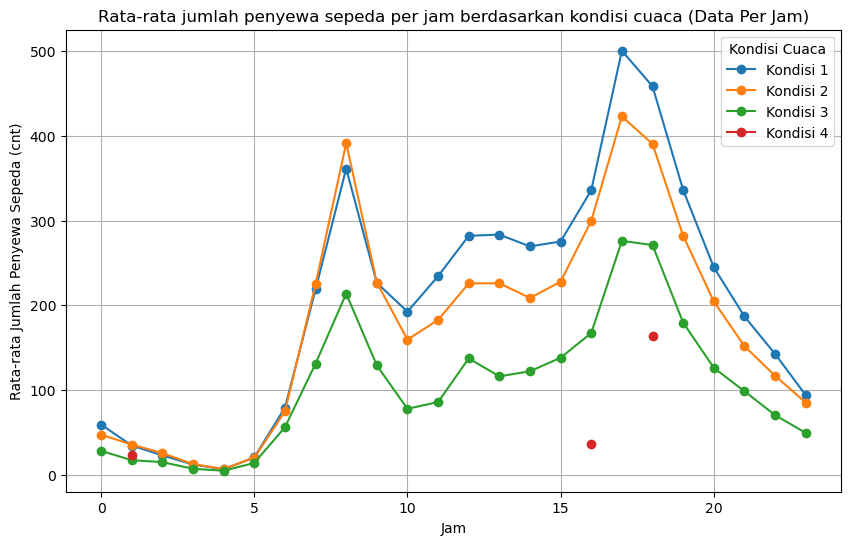

In [45]:
# Membuat plot
plt.figure(figsize=(10, 6))
for column in weather_by_hour.columns:
    plt.plot(weather_by_hour.index, weather_by_hour[column], marker="o", linestyle="-", label=f'Kondisi {column}')

plt.title("Rata-rata jumlah penyewa sepeda per jam berdasarkan kondisi cuaca (Data Per Jam)")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewa Sepeda (cnt)")
plt.legend(title="Kondisi Cuaca")
plt.grid(True)
plt.show()

**Insight Pertanyaan 1:**
- Berdasarkan grafik 1, penyewaan sepeda tertinggi terjadi saat kondisi cuaca cerah (kondisi 1), diikuti kondisi cuaca berkabut (kondisi 2). Sementara saat kondisi cuaca salju dan hujan ringan (kondisi 3) cenderung mengalami penurunan drastis.
    - Untuk menjaga kegiatan operasional saat cuaca buruk, mungkin dapat dilakukan pengoptimalan aplikasi dengan memperbarui informasi cuaca secara real-time dan memberikan rekomendasi rute sepeda yang lebih aman. Selanjutnya jika memungkinan, bisa mengadakan asuransi perlindungan cuaca buruk bagi pelanggan setia.
    - Pada saat cuaca cerah, ada baiknya meningkatkan jumlah sepeda untuk disewa agar kepuasan dan kesetiaan pelanggan terjaga.
    - Secara garis besar, grafik 1 memberikan gambaran umum tren penyewaan sepeda berdasarkan kondisi cuaca menggunakan tabel day_df
- Berdasarkan grafik 2, data hour_df menjelaskan bahwa di hari dengan kondisi cuaca cerah dan berkabut (kondisi 1 dan 2) memiliki rata-rata lonjakan jumlah penyewaan sepeda yang tinggi di jam-jam tertentu seperti pada kisaran pukul 8 (pagi hari) dan pukul 17 (sore hari). Terjadinya lonjakan penyewaan sepeda pada kisaran kedua jam tersebut dimungkinkan karena adanya aktivitas berangkat ke kantor atau antar sekolah dan aktivitas pulang kerja atau sekadar rekreasi sore hari. 
    - Oleh karena itu, ketersediaan sepeda pada waktu-waktu tersebut dapat ditingkatkan sementara di luar waktu tersebut dapat digunakan sebagai jadwal perawatan atau redistribusi sepeda agar meningkatkan kepuasaan pengguna atau pelanggan

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada hari kerja dibandingkan weekend?

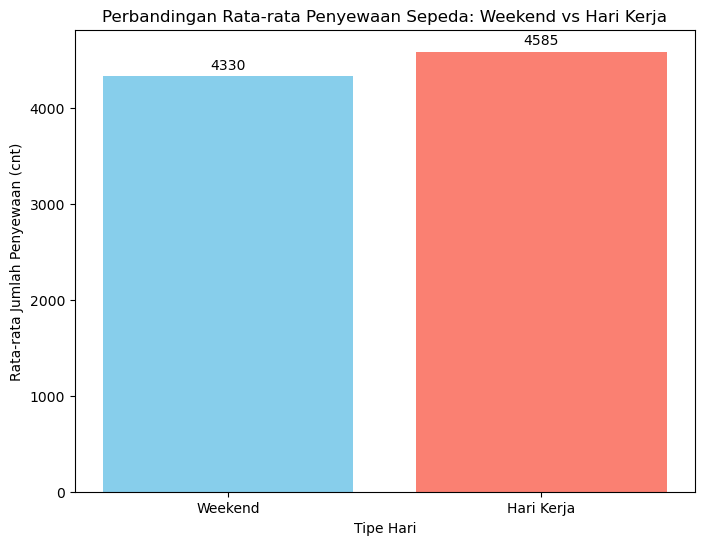

In [46]:
"""
Bar Chart untuk melihat perbedaan rata-rata jumlah penyewaan sepeda 
"""

# Mengelompokkan data berdasarkan 'workingday' dan menghitung rata-rata jumlah penyewaan sepeda
avg_rentals = day_df.groupby('workingday')['cnt'].mean()

# Membuat label untuk masing-masing kategori
labels = {0: "Weekend", 1: "Hari Kerja"}

# Bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar([labels[k] for k in avg_rentals.index], avg_rentals.values, color=["skyblue", "salmon"])

ax.set_title("Perbandingan Rata-rata Penyewaan Sepeda: Weekend vs Hari Kerja")
ax.set_xlabel("Tipe Hari")
ax.set_ylabel("Rata-rata Jumlah Penyewaan (cnt)")

# Menambahkan nilai di atas tiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(round(height))}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset vertikal 3 points
                textcoords="offset points",
                ha="center", va="bottom")

plt.show()

<Figure size 800x600 with 0 Axes>

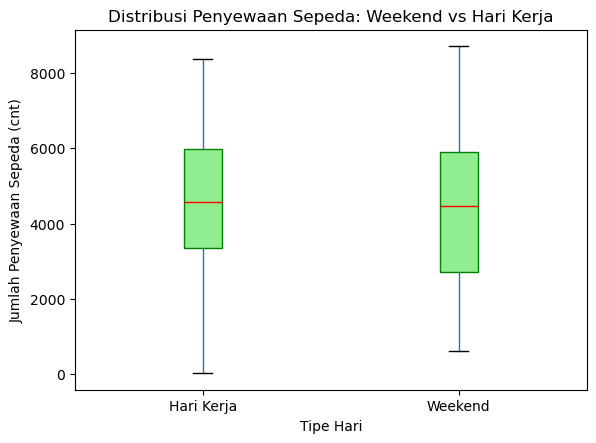

In [47]:
"""
Box plot untuk menampilkan distribusi data penyewaan pada weekend vs hari kerja
"""

# Buat box plot berdasarkan 'workingday'
plt.figure(figsize=(8, 6))
day_df['TipeHari'] = day_df['workingday'].apply(lambda x: "Hari Kerja" if x == 1 else "Weekend")
day_df.boxplot(column='cnt', by='TipeHari', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='red'))
plt.title("Distribusi Penyewaan Sepeda: Weekend vs Hari Kerja")
plt.suptitle("")  # Menghapus title bawaan boxplot
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.show()

**Insights:**
- Berdasarkan bar chart, rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi (4585 unit) dibandingkan dengan weekend (4330 unit).
- Berdasarkan box plot, nilai median (garis merah) pada hari kerja dan weekend di kisaran yang hampir sama (sekitar 4500 penyewaan). Hal ini menunjukkan bahwa rata-rata tengah penyewaan sepeda tidak berbeda signifikan antara hari kerja dan weekend.
    - Interquartile range (IQR), bagian kotak hijau, untuk kedua kategori (hari kerja dan weekend) hampir sama, artinya variasi atau sebaran data di tengah distribusi juga serupa. Hal ini mengindikasikan bahwa fluktuasi penyewaan sepeda di kedua kategori tidak jauh berbeda.
    - whiskers (garis vertikal di atas dan bawah kotak hijau) menunjukkan rentang data secara keseluruhan yang dianggap normal (tanpa outlier) juga memiliki panjang whiskers yang hampir sama antara hari kerja dan akhir pekan mengindikasikan bahwa rentang total variasi data penyewaan sepeda secara keseluruhan juga konsisten antara kedua tipe hari.

## Analisis Lanjutan (Opsional)

Bisa RFM analysis, geospatial analysis, clutering, dll

## Conclusion

- Conclution pertanyaan 1: Kondisi cuaca memengaruhi rata-rata penyewaan sepeda pada waktu-waktu genting. Terdapat lonjakan penyewaan pada pagi hari (jam 6–9) dan sore hari (jam 16–19) saat cuaca cerah (kondisi 1), yang mengindikasikan bahwa penyewa memanfaatkan waktu tersebut untuk perjalanan pulang-pergi ke kantor atau sekolah, serta rekreasi sore. Sebaliknya, pada kondisi cuaca buruk (kondisi 3), terutama untuk kondisi 4, tidak tampak adanya lonjakan, bahkan terjadi penurunan signifikan di jam-jam sibuk, yang menunjukkan bahwa cuaca tidak bersahabat secara langsung menghambat aktivitas penyewaan di waktu-waktu genting.
- Conclution pertanyaan 2: Kedua visualisasi menunjukkan bahwa meskipun terdapat sedikit perbedaan rata-rata (hari kerja cenderung lebih tinggi), namun pola sebaran data penyewaan sepeda antara hari kerja dan weekend sangat mirip jika dilihat dari median, IQR, dan whiskers. Artinya, selain perbedaan rata-rata yang kecil, fluktuasi dan penyebaran data tidak menunjukkan perbedaan yang signifikan.

In [48]:
# Menyimpan dataset secara terpisah
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)